In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Load the datasets
train_data = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

# One-hot encoding for 'Sex' 
ohe = OneHotEncoder()
sex_encoded = ohe.fit_transform(train_data[['Sex']]).toarray()
sex_columns = ohe.get_feature_names_out(['Sex'])
sex_df = pd.DataFrame(sex_encoded, columns=sex_columns)

# Merge encoded columns and drop original 'Sex' column
train_data = pd.concat([train_data, sex_df], axis=1)
train_data.drop('Sex', axis=1, inplace=True)

#test set one-hot encoding
# One-hot encoding for 'Sex' 
ohe = OneHotEncoder()
sex_encoded = ohe.fit_transform(test_data[['Sex']]).toarray()
sex_columns = ohe.get_feature_names_out(['Sex'])
sex_df = pd.DataFrame(sex_encoded, columns=sex_columns)

# Merge encoded columns for test dataset and drop original 'Sex' column
test_data = pd.concat([test_data, sex_df], axis=1)
test_data.drop('Sex', axis=1, inplace=True)

#keep IDs from test data separate
test_ID = test_data['id']

#drop ID from test dataset
test_data.drop('id', axis=1, inplace=True)

# Define features and target
X = train_data.drop(['Rings', 'id'], axis=1)
y = train_data['Rings']

#don't think we need to split for this data.
# Train-test split
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

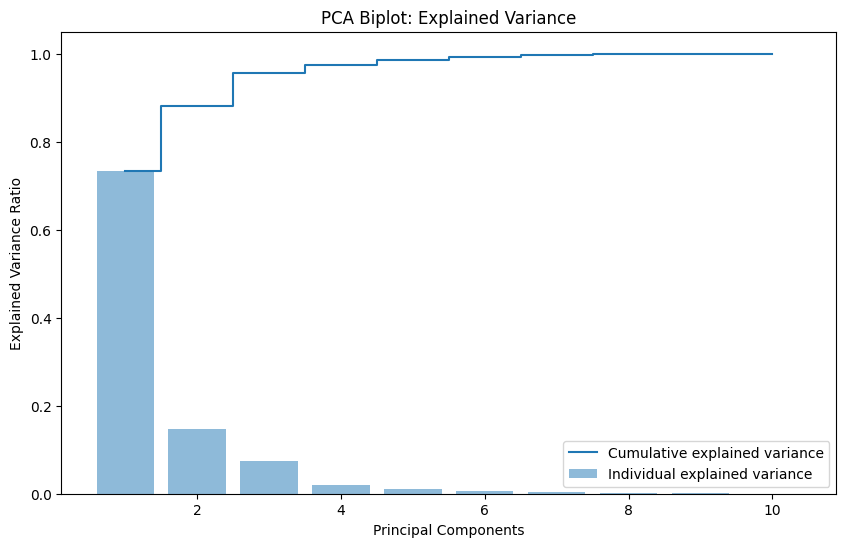

In [23]:
# Standardize features for train and test data
scaler = StandardScaler(with_std=True ,
                        with_mean=True)
train_data_scaled = scaler.fit_transform(X)
test_data_scaled = scaler.fit_transform(test_data)

pca = PCA()
X_train_pca = pca.fit_transform(train_data_scaled)

# Explained variance plot (Biplot)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.title('PCA Biplot: Explained Variance')
plt.show()

In [32]:
#Fit PCA model
pca = PCA(n_components=4) #selected 4 from biplot (amount of variance explained plot)
X_train_pca = pca.fit_transform(train_data_scaled)
X_test_pca = pca.transform(test_data_scaled)

model_pcr = LinearRegression()
model_pcr.fit(X_train_pca, y)


LinearRegression()

In [35]:
# Predict on the test set using the trained PCA model
test_predictions = model_pcr.predict(X_test_pca)
test_predictions = np.maximum(test_predictions, 0)  # Ensure predictions are >= 0

In [36]:
# Prepare the submission file
#round the predictions to integers
submission = pd.DataFrame({
    'id': test_ID,  
    'Rings': test_predictions.round().astype(int)
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print('Submission file created: submission.csv')



submission


Submission file created: submission.csv


,id,Rings
0,90615,11
1,90616,11
2,90617,10
3,90618,11
4,90619,8
...,...,...
60406,151021,7
60407,151022,10
60408,151023,10
60409,151024,12
